**Project Title:Future Sales Prediction**

Time series Forecasting using Arima Model(pmdarima)

In [88]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from pathlib import Path
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
df =pd.read_csv("/content/drive/MyDrive/EDA dataset/Sales (1).csv")
df

,Date,TV,Radio,Newspaper,Sales
0,12-04-2023,230.1,37.8,69.2,22.1
1,13-04-2023,44.5,39.3,45.1,10.4
2,14-04-2023,17.2,45.9,69.3,12.0
3,15-04-2023,151.5,41.3,58.5,16.5
4,16-04-2023,180.8,10.8,58.4,17.9
...,...,...,...,...,...
195,24-10-2023,38.2,3.7,13.8,7.6
196,25-10-2023,94.2,4.9,8.1,14.0
197,26-10-2023,177.0,9.3,6.4,14.8
198,27-10-2023,283.6,42.0,66.2,25.5


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [92]:
duplicates = df.duplicated()

# Print the duplicate rows
print(df[duplicates])

Empty DataFrame
Columns: [Date, TV, Radio, Newspaper, Sales]
Index: []


In [93]:
# Drop duplicate rows
data = df.drop_duplicates()

# Print the updated DataFrame
print(data)

           Date     TV  Radio  Newspaper  Sales
0    12-04-2023  230.1   37.8       69.2   22.1
1    13-04-2023   44.5   39.3       45.1   10.4
2    14-04-2023   17.2   45.9       69.3   12.0
3    15-04-2023  151.5   41.3       58.5   16.5
4    16-04-2023  180.8   10.8       58.4   17.9
..          ...    ...    ...        ...    ...
195  24-10-2023   38.2    3.7       13.8    7.6
196  25-10-2023   94.2    4.9        8.1   14.0
197  26-10-2023  177.0    9.3        6.4   14.8
198  27-10-2023  283.6   42.0       66.2   25.5
199  28-10-2023  232.1    8.6        8.7   18.4

[200 rows x 5 columns]


In [94]:
#checking for missing values
df.isna().head()

,Date,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [95]:
def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""

    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []

    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing,
        'pc_missing': pc_missing
    })

    return output

In [96]:
show_missing(df)

,variable,dtype,count,unique,missing,pc_missing
0,Date,object,200,200,0,0.0
1,TV,float64,200,190,0,0.0
2,Radio,float64,200,167,0,0.0
3,Newspaper,float64,200,172,0,0.0
4,Sales,float64,200,121,0,0.0


In [97]:
import plotly.express as px

figure = px.scatter(df, x='Sales', y='TV', size='TV', trendline='ols', title='Relationship Between Sales and TV Advertising')
figure.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
figure.update_layout(
    xaxis_title='Sales',
    yaxis_title='TV Advertising',
    legend_title='TV Ad Size',
    plot_bgcolor='white'
)
figure.show()

In [98]:
figure = px.scatter(df, x='Sales', y='Newspaper', size='Newspaper', trendline='ols', title='Relationship Between Sales and Newspaper Advertising')
figure.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
figure.update_layout(
    xaxis_title='Sales',
    yaxis_title='Newspaper Advertising',
    legend_title='Newspaper Ad Size',
    plot_bgcolor='white'
)
figure.show()

In [99]:
figure = px.scatter(df, x='Sales', y='Radio', size='Radio', trendline='ols', title='Relationship Between Sales and Radio Advertising')
figure.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
figure.update_layout(
    xaxis_title='Sales',
    yaxis_title='Radio Advertising',
    legend_title='Radio Ad Size',
    plot_bgcolor='white'
)
figure.show()

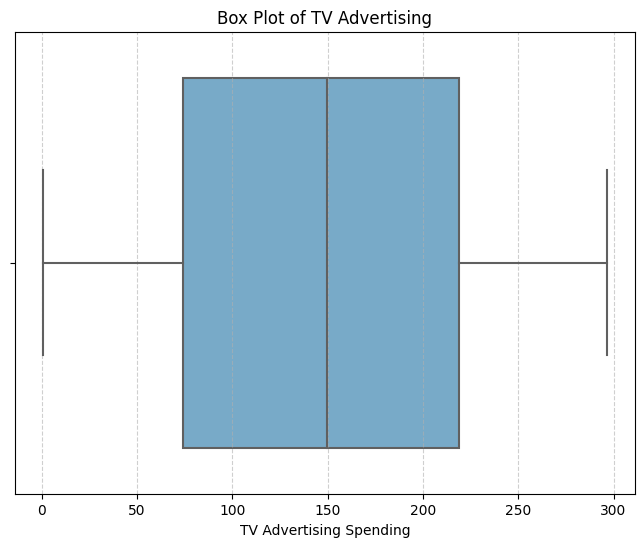

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='TV', data=df, palette='Blues')
plt.title('Box Plot of TV Advertising')
plt.xlabel('TV Advertising Spending')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

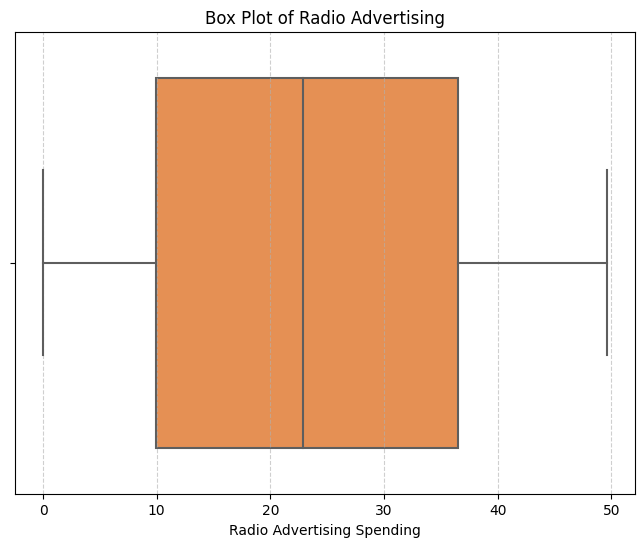

In [101]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Radio', data=df, palette='Oranges')
plt.title('Box Plot of Radio Advertising')
plt.xlabel('Radio Advertising Spending')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

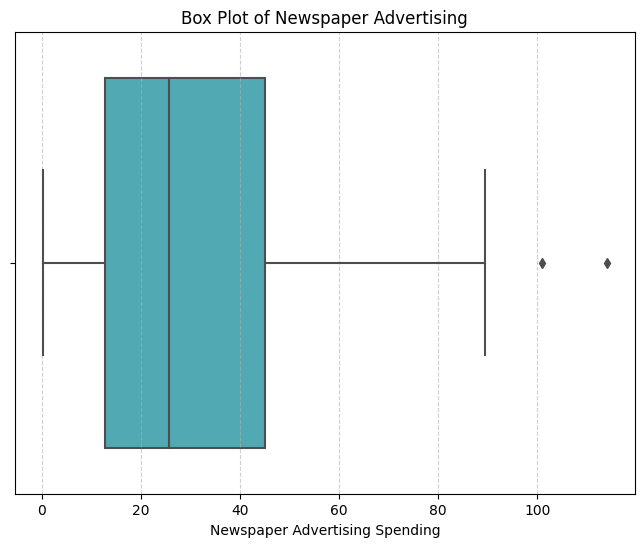

In [102]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Newspaper', data=df, palette='YlGnBu')
plt.title('Box Plot of Newspaper Advertising')
plt.xlabel('Newspaper Advertising Spending')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [103]:
import numpy as np

# Ambang batas atas (threshold) untuk Winsorizing
upper_threshold = 2 * np.std(df['Newspaper']) + np.mean(df['Newspaper'])

# Menerapkan Winsorizing pada kolom 'Newspaper'
df['Newspaper'] = np.where(df['Newspaper'] > upper_threshold, upper_threshold, df['Newspaper'])

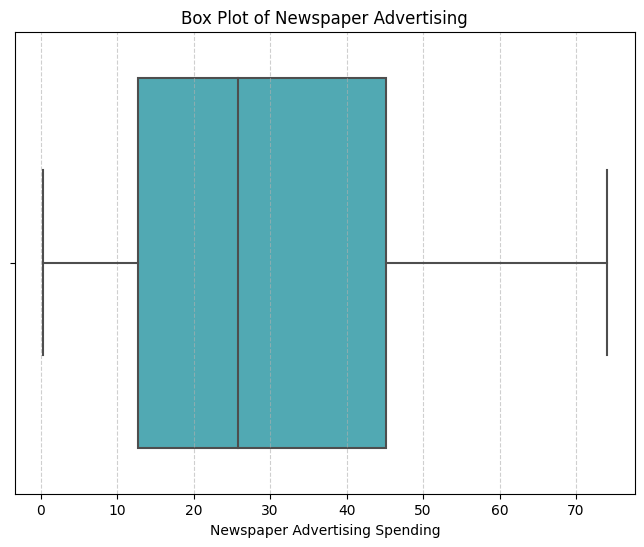

In [104]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Newspaper', data=df, palette='YlGnBu')
plt.title('Box Plot of Newspaper Advertising')
plt.xlabel('Newspaper Advertising Spending')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [105]:
from datetime import datetime, timedelta
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 7, 19)

# Create a range of date-time values between start and end dates
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

In [106]:
# Iterate through the columns in the DataFrame
for column in df.columns:
    # Add the date-time values to each column
    df['DateTime'] = date_range

In [107]:
df

,Date,TV,Radio,Newspaper,Sales,DateTime
0,12-04-2023,230.1,37.8,69.2,22.1,2023-01-01
1,13-04-2023,44.5,39.3,45.1,10.4,2023-01-02
2,14-04-2023,17.2,45.9,69.3,12.0,2023-01-03
3,15-04-2023,151.5,41.3,58.5,16.5,2023-01-04
4,16-04-2023,180.8,10.8,58.4,17.9,2023-01-05
...,...,...,...,...,...,...
195,24-10-2023,38.2,3.7,13.8,7.6,2023-07-15
196,25-10-2023,94.2,4.9,8.1,14.0,2023-07-16
197,26-10-2023,177.0,9.3,6.4,14.8,2023-07-17
198,27-10-2023,283.6,42.0,66.2,25.5,2023-07-18


In [108]:
df.dtypes

Date                 object
TV                  float64
Radio               float64
Newspaper           float64
Sales               float64
DateTime     datetime64[ns]
dtype: object

In [109]:
missing_values = df.isna()
total_missing = missing_values.sum().sum()
total_missing

0

In [110]:
import plotly.express as px

In [111]:
fig = px.line(df, x='DateTime', y='Sales', title='Total Sales')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

In [112]:
el_df=df.set_index('DateTime')

array([<Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>,
       <Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>], dtype=object)

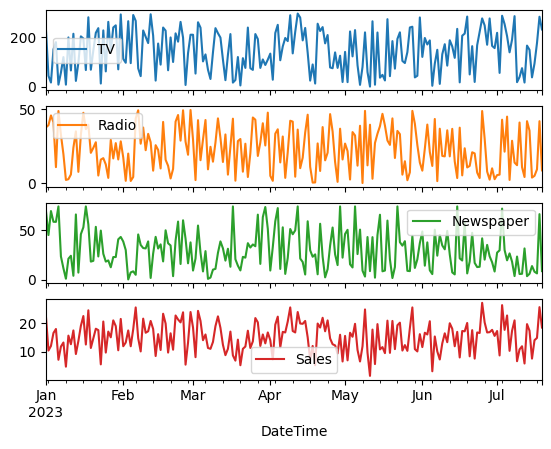

In [113]:
el_df.plot(subplots=True)

In [114]:
print ("\nMissing values :  ", df.isnull().any())


Missing values :   Date         False
TV           False
Radio        False
Newspaper    False
Sales        False
DateTime     False
dtype: bool


In [115]:
el_df.resample('M').mean()

<ipython-input-115-421011436e0d>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,TV,Radio,Newspaper,Sales
DateTime,,,,
2023-01-31,142.064516,24.319355,36.519498,14.954839
2023-02-28,167.635714,24.878571,29.460714,16.478571
2023-03-31,126.100000,25.803226,29.283942,14.367742
2023-04-30,160.776667,21.656667,33.016814,16.020000
2023-05-31,128.183871,25.816129,29.819498,13.838710
2023-06-30,155.813333,19.100000,27.446740,15.093333
2023-07-31,154.221053,19.968421,21.400000,15.436842


<ipython-input-116-052b9850bc35>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



array([<Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>,
       <Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>], dtype=object)

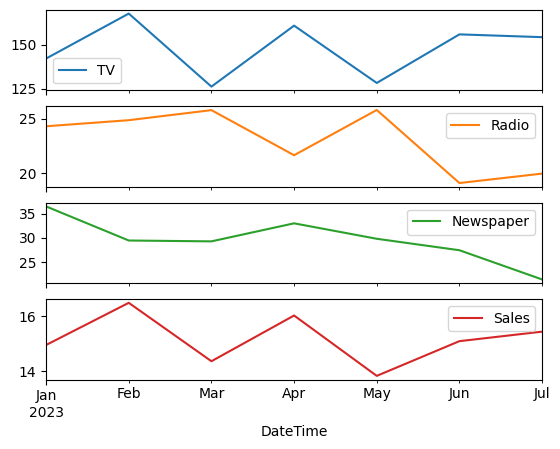

In [116]:
el_df.resample('M').mean().plot(subplots=True)

In [117]:
final_df=el_df.resample('M').mean()
final_df

<ipython-input-117-262a0f12b9cd>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,TV,Radio,Newspaper,Sales
DateTime,,,,
2023-01-31,142.064516,24.319355,36.519498,14.954839
2023-02-28,167.635714,24.878571,29.460714,16.478571
2023-03-31,126.100000,25.803226,29.283942,14.367742
2023-04-30,160.776667,21.656667,33.016814,16.020000
2023-05-31,128.183871,25.816129,29.819498,13.838710
2023-06-30,155.813333,19.100000,27.446740,15.093333
2023-07-31,154.221053,19.968421,21.400000,15.436842


In [118]:
!pip install pmdarima

In [119]:
import pmdarima as pm

In [120]:
model = pm.auto_arima(final_df['Sales'],
                        m=12, seasonal=False,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning:

m (12) set for non-seasonal fit. Setting to 0



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=59.957, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=21.474, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20.463, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=22.433, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=34.692, Time=0.60 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.115 seconds


In [121]:
train=final_df[(final_df.index.get_level_values(0) >= '2023-01-31') & (final_df.index.get_level_values(0) <= '2023-05-31')]

In [122]:
test=final_df[(final_df.index.get_level_values(0) > '2023-05-31')]

In [123]:
test

,TV,Radio,Newspaper,Sales
DateTime,,,,
2023-06-30,155.813333,19.100000,27.44674,15.093333
2023-07-31,154.221053,19.968421,21.40000,15.436842


In [124]:
model.fit(train['Sales'])

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [125]:
forecast=model.predict(n_periods=4, return_conf_int=True)

In [126]:
forecast

(2023-06-30    16.519554
 2023-07-31    14.269223
 2023-08-31    16.158176
 2023-09-30    14.572567
 Freq: M, dtype: float64,
 array([[15.42250821, 17.61659955],
        [12.83691124, 15.70153389],
        [14.53059205, 17.78576082],
        [12.82041195, 16.32472192]]))

In [127]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

In [128]:
forecast_df

,Prediction
DateTime,
2023-06-30,16.519554
2023-07-31,14.269223


In [129]:
import matplotlib.pyplot as plt

<Axes: xlabel='DateTime'>

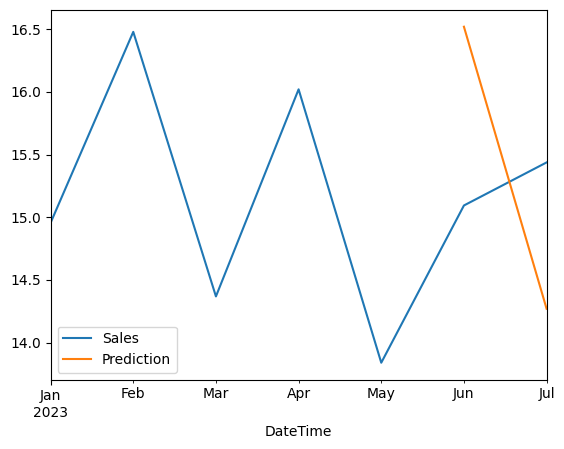

In [130]:
pd.concat([final_df['Sales'],forecast_df],axis=1).plot()

In [131]:
forecast1=model.predict(n_periods=8, return_conf_int=True)
forecast_range=pd.date_range(start='2023-06-30', periods=8,freq='M')

In [132]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

<Axes: >

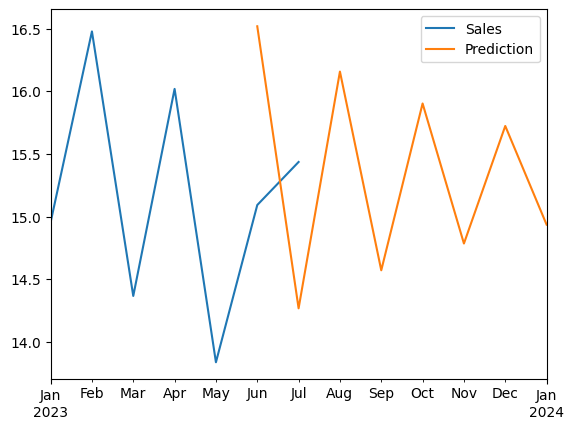

In [133]:
pd.concat([final_df['Sales'],forecast1_df],axis=1).plot()